<a href="https://colab.research.google.com/github/estortega/project_4/blob/main/CreditCardFraudDetection_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import files
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import numpy as np

uploaded = files.upload()

import pandas as pd
df = pd.read_csv("creditcard_sample.csv")

df.head()

Saving creditcard_sample.csv to creditcard_sample (11).csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [59]:
import sqlite3

# Create (or connect to) a local SQLite database in memory or a file
conn = sqlite3.connect("creditcard.db")  # or ":memory:" to keep it temporary

# Save the dataframe to a table named 'transactions'
df.to_sql("transactions", conn, if_exists="replace", index=False)

20000

In [60]:
# Read it back using a SQL query
df_sql = pd.read_sql("SELECT * FROM transactions", conn)

# Confirm it works
df_sql.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [61]:
pd.read_sql("SELECT * FROM transactions WHERE Class = 1", conn)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,74262.0,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,0.174216,...,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,311.28,1
2,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1
3,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1
4,87883.0,-1.360293,-0.458069,-0.700404,2.737229,-1.005106,2.891399,5.802537,-1.933197,-1.017717,...,-0.936990,-0.053812,0.580106,0.216927,0.151643,-0.332115,-0.469800,-1.495006,829.41,1
5,56887.0,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1
6,27252.0,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,99.99,1
7,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
8,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
9,59385.0,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.98,1


In [62]:
# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [63]:
# Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3992    1]
 [   2    5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       0.83      0.71      0.77         7

    accuracy                           1.00      4000
   macro avg       0.92      0.86      0.88      4000
weighted avg       1.00      1.00      1.00      4000



##Evaluate Fraud Detection Model

Text(0.5, 1.0, 'Confusion Matrix')

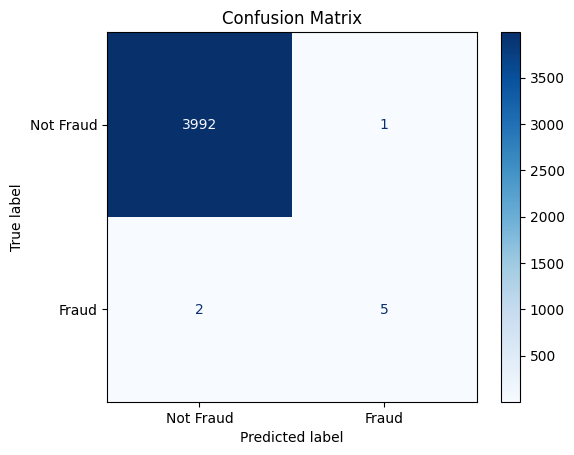

In [65]:
disp = ConfusionMatrixDisplay.from_estimator(
    pipeline, X_test, y_test,
    display_labels=["Not Fraud", "Fraud"],
    cmap="Blues"
)
disp.ax_.set_title("Confusion Matrix")

[[3992    1]
 [   2    5]]
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996      3993
           1     0.8333    0.7143    0.7692         7

    accuracy                         0.9992      4000
   macro avg     0.9164    0.8570    0.8844      4000
weighted avg     0.9992    0.9992    0.9992      4000



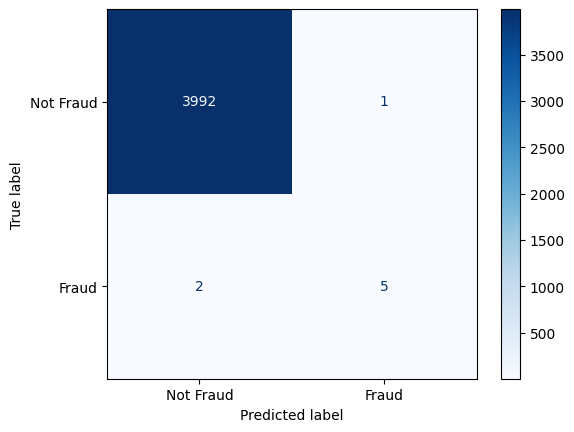

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=["Not Fraud", "Fraud"], cmap="Blues")

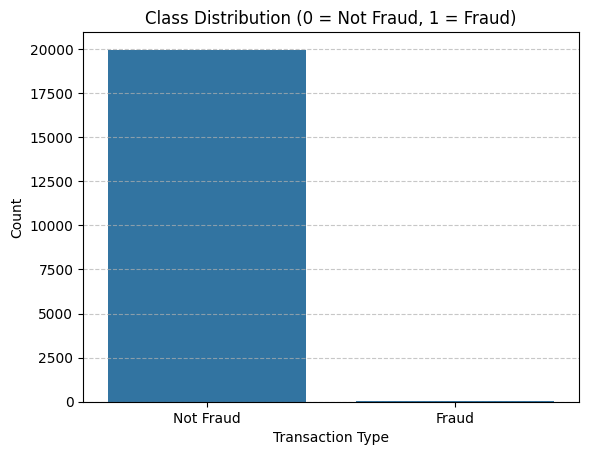

In [67]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Fraud", "Fraud"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

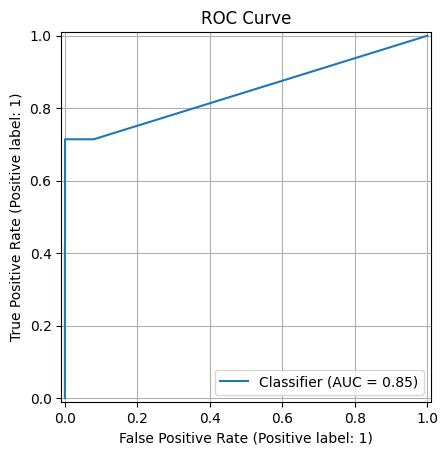

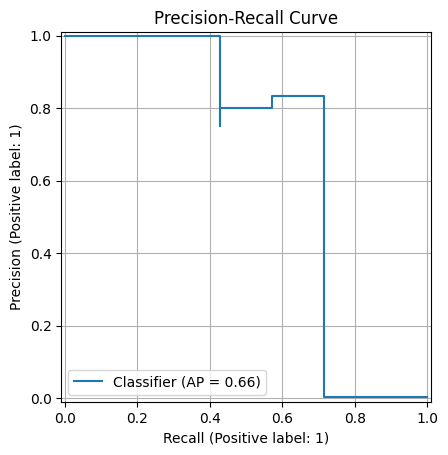

In [68]:
# Get predicted probabilities for class 1 (fraud)
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_scores)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_scores)
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

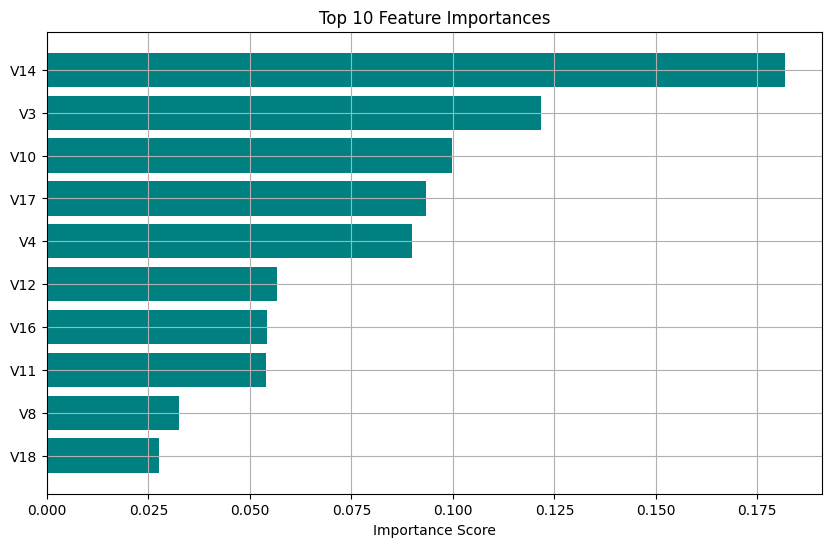

In [69]:
# Get feature importances from the trained Random Forest
rf_model = pipeline.named_steps["model"]
importances = rf_model.feature_importances_

# Top 10 features
indices = np.argsort(importances)[-10:]
top_features = [X.columns[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features, importances[indices], color="teal")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)

In [70]:
from sklearn.manifold import TSNE
import seaborn as sns

# Downsample data for faster t-SNE (optional, since fraud is rare)
df_sample = df.sample(n=5000, random_state=42)

X_sample = df_sample.drop("Class", axis=1)
y_sample = df_sample["Class"]

# Reduce features to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X_sample)

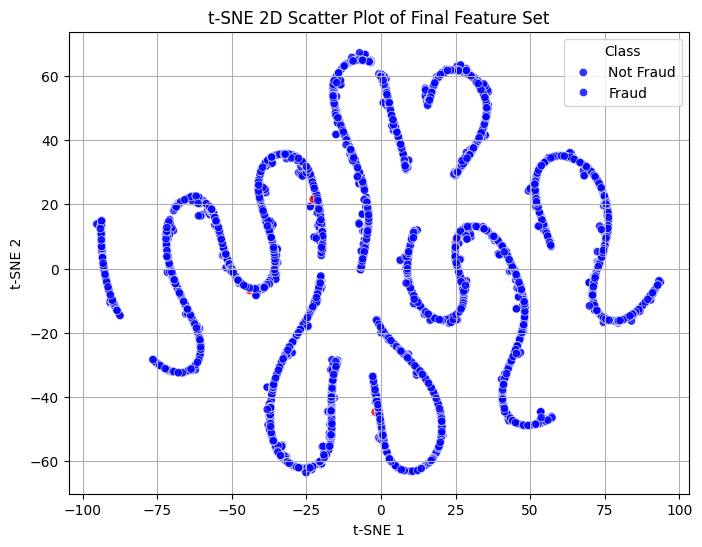

In [71]:
# Put 2D output into DataFrame
tsne_df = pd.DataFrame({
    "X": X_2d[:, 0],
    "Y": X_2d[:, 1],
    "Class": y_sample
})

# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="X", y="Y", hue="Class", palette={0: "blue", 1: "red"}, data=tsne_df, alpha=0.8
)
plt.title("t-SNE 2D Scatter Plot of Final Feature Set")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Class", labels=["Not Fraud", "Fraud"])
plt.grid(True)
plt.show()